In [21]:
# Step 1: imports and load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

# load dataset
df = pd.read_csv("amazon.csv")


In [22]:
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [23]:
# Step 2: clean price-like columns (remove currency symbols, commas, percent signs)
# Use .astype(str) then regex replacement to be robust
price_cols = ['discounted_price', 'actual_price', 'discount_percentage']

for col in price_cols:
    if col in df.columns:
        # convert to string then remove common non-digit characters (₹,$, commas, % etc.)
        df.loc[:, col] = df[col].astype(str).str.replace(r'[^0-9\.\-]', '', regex=True)
        # convert cleaned string to numeric, coerce errors to NaN
        df.loc[:, col] = pd.to_numeric(df.loc[:, col], errors='coerce')

# Ensure rating and rating_count numeric
df.loc[:, 'rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.loc[:, 'rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Check results
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].info()
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   discounted_price     1465 non-null   object
 1   actual_price         1465 non-null   object
 2   discount_percentage  1465 non-null   object
 3   rating               1464 non-null   object
 4   rating_count         326 non-null    object
dtypes: object(5)
memory usage: 57.4+ KB


,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64,4.2,NaN
1,199.0,349.0,43,4.0,NaN
2,199.0,1899.0,90,3.9,NaN
3,329.0,699.0,53,4.2,NaN
4,154.0,399.0,61,4.2,NaN


In [24]:
# Step 3.1: Missing values summary
missing_before = df.isnull().sum()
display(missing_before)

# Handling strategy:
# - numeric price columns: keep NaN for now; we'll impute where needed or drop rows for analysis that require prices.
# - rating: fill with mean
# - rating_count: fill with 0 (no reviews)
# - category: fill with 'Unknown'

# Fill simple missing values
df.loc[:, 'rating'] = df['rating'].fillna(df['rating'].mean())
df.loc[:, 'rating_count'] = df['rating_count'].fillna(0)
df.loc[:, 'category'] = df['category'].fillna('Unknown')

missing_after = df.isnull().sum()
display(missing_after)


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,1139
about_product,0
user_id,0


/tmp/ipython-input-381156460.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'rating'] = df['rating'].fillna(df['rating'].mean())
/tmp/ipython-input-381156460.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'rating_count'] = df['rating_count'].fillna(0)


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [25]:
# Step 3.2: Outlier detection for discounted_price
col = 'discounted_price'

# show count of non-null values
print("Non-null count for", col, ":", df[col].notnull().sum())

# compute IQR only on non-null values
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
print("Lower bound:", lower_bound, "Upper bound:", upper_bound)

# identify outliers (only where price is not null)
outliers = df[(df[col].notnull()) & ((df[col] < lower_bound) | (df[col] > upper_bound))]
print("Outliers Count:", len(outliers))

# Show a sample of outliers
outliers_sample = outliers.head(10)
display(outliers_sample[[ 'product_id','product_name', col ]])

# Remove outliers for analysis in a new dataframe (so original df preserved)
df_no_outliers = df[~df.index.isin(outliers.index)].copy()
print("Rows before:", len(df), "Rows after removing outliers:", len(df_no_outliers))


Non-null count for discounted_price : 1465
Q1: 325.0 Q3: 1999.0 IQR: 1674.0
Lower bound: -2186.0 Upper bound: 4510.0
Outliers Count: 217


,product_id,product_name,discounted_price
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,13999.0
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,13490.0
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,13490.0
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,11499.0
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,14999.0
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,32999.0
41,B09JPC82QC,Mi 108 cm (43 inches) Full HD Android LED TV 4...,19999.0
53,B07MKFNHKG,VW 80 cm (32 inches) Frameless Series HD Ready...,6999.0
57,B09Q5SWVBJ,OnePlus 80 cm (32 inches) Y Series HD Ready Sm...,15999.0
61,B0B15CPR37,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,32990.0


Rows before: 1465 Rows after removing outliers: 1248


In [26]:
# Step 3.3: Data reduction
cols_to_drop = ['review_id', 'review_title', 'review_content', 'img_link', 'product_link', 'about_product']
existing_drops = [c for c in cols_to_drop if c in df.columns]

df_reduced = df_no_outliers.drop(columns=existing_drops, errors='ignore').copy()

# sample 70% for faster operations
df_sampled = df_reduced.sample(frac=0.7, random_state=42)

print("Reduced columns dropped:", existing_drops)
print("Original rows:", len(df_no_outliers), "Sampled rows:", len(df_sampled))
df_sampled.head()


Reduced columns dropped: ['review_id', 'review_title', 'review_content', 'img_link', 'product_link', 'about_product']
Original rows: 1248 Sampled rows: 874


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name
824,B017NC2IPM,RESONATE RouterUPS CRU12V2A | Zero Drop | UPS ...,Computers&Accessories|NetworkingDevices|Routers,1799.0,2911.0,38,4.3,0.0,"AEV2RFEWLJIWQDBU7FMHAUJT7PQQ,AGN4RT66HR52VG2S2...","JAYASHANKAR VB,SHAHABAAZ SHEIKH,Ranjan,Nilanja..."
1035,B00O24PUO6,Orpat OEH-1260 2000-Watt Fan Heater (Grey),"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1464.0,1650.0,11,4.1,0.0,"AE6PYJAIQ4PNYJNVMWW6NOCP2SPA,AGQBKNH24HGPL3INP...","Sandeep,Rajiv,Adarsh Patel,Devansh Hooda,Vikra..."
1058,B0BK1K598K,"AGARO LR2007 Lint Remover, Rechargeable, for W...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",678.0,1499.0,55,4.2,900.0,"AHHR537KLQY7CNKPQSL3SFUGQFYQ,AEWMRBC2Q3TOCF3OZ...","Nirupma Kumari,Abhijeet Singh,Mukul,palak,Amri..."
304,B0B61GCHC1,LS LAPSTER Quality Assured USB 2.0 morpho cabl...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,4.3,87.0,"AHCVVEWW2RUKPIMC63N6LXF2DQJQ,AFATPF5UULFKGVJIN...","Suvaraj d.,Rai Sahib,Kindle Customer,Vijay kum..."
430,B089WB69Y1,"USB Charger, Oraimo Elite Dual Port 5V/2.4A Wa...",Electronics|Mobiles&Accessories|MobileAccessor...,249.0,649.0,62,4.0,0.0,"AEKSR7FVH2XR55S47DZZLAFA4KHQ,AH2Z4CKZS7LRJGKNN...","Samar Kumar Das,Jamshed,Jitendra Prajapati,Om ..."


In [27]:
# Step 3.4: Scaling numeric price columns and discretize rating
scale_cols = [c for c in ['discounted_price','actual_price','discount_percentage'] if c in df_sampled.columns]

# Some rows may have NaN in scale_cols; drop them for scaling step to avoid errors (or fill with median if you prefer)
df_scale = df_sampled.copy()
df_scale = df_scale.dropna(subset=scale_cols)  # we need numeric rows for scaling

scaler = MinMaxScaler()
df_scale.loc[:, scale_cols] = scaler.fit_transform(df_scale[scale_cols])

# Discretize rating into Low/Medium/High
bins = [0, 2, 3.5, 5]
labels = ['Low', 'Medium', 'High']
df_scale.loc[:, 'rating_level'] = pd.cut(df_scale['rating'], bins=bins, labels=labels, include_lowest=True)

# show before/after (we'll display the first 5 rows)
df_sampled[['discounted_price','actual_price','discount_percentage','rating']].head()
df_scale[['discounted_price','actual_price','discount_percentage','rating','rating_level']].head()


,discounted_price,actual_price,discount_percentage,rating,rating_level
824,0.394619,0.143888,0.404255,4.3,High
1035,0.319507,0.080711,0.117021,4.1,High
1058,0.143274,0.073146,0.585106,4.2,High
304,0.035874,0.048096,0.851064,4.3,High
430,0.047085,0.030561,0.659574,4.0,High


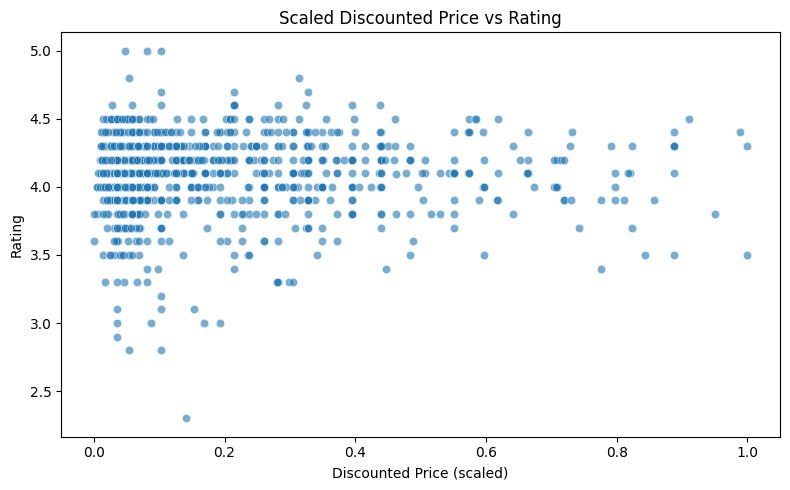

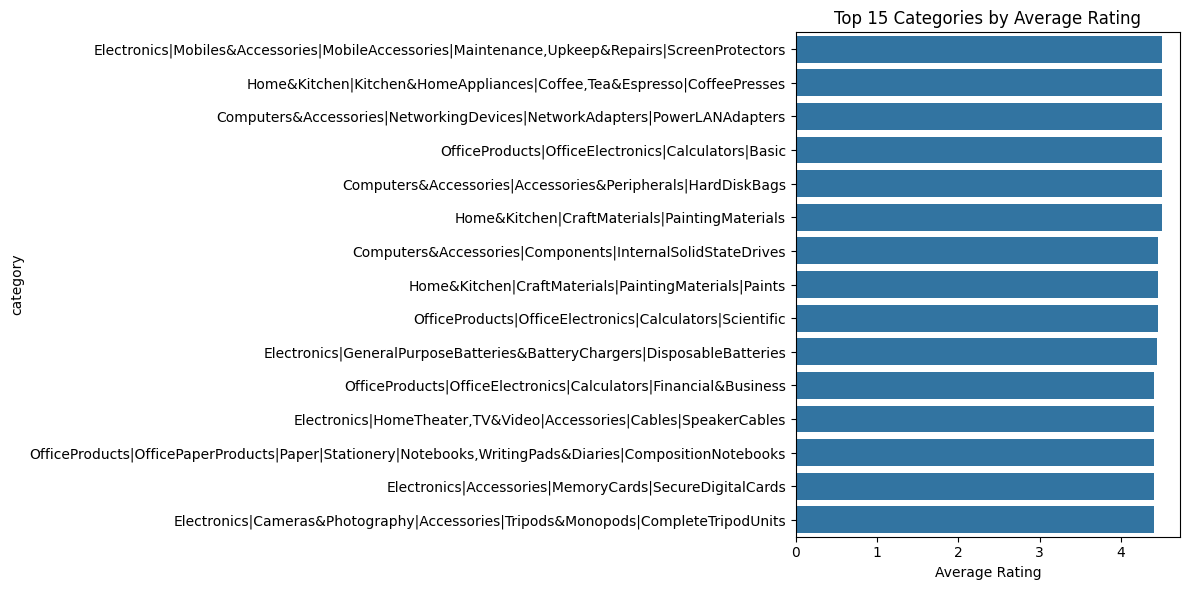

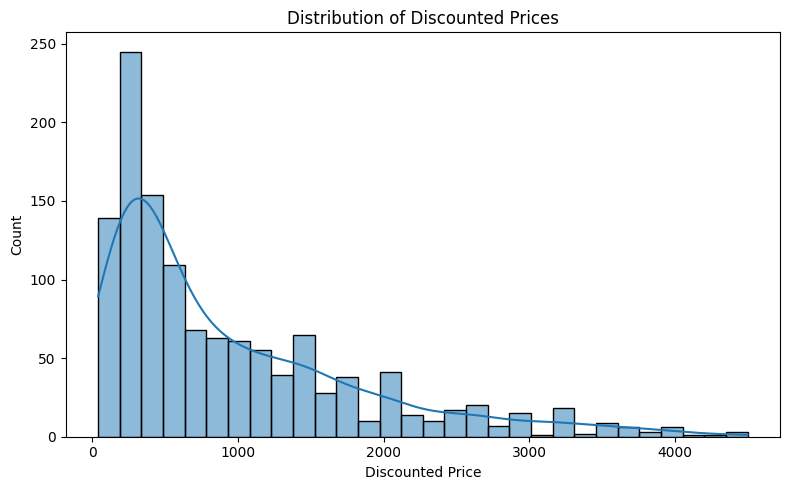

/tmp/ipython-input-118511491.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


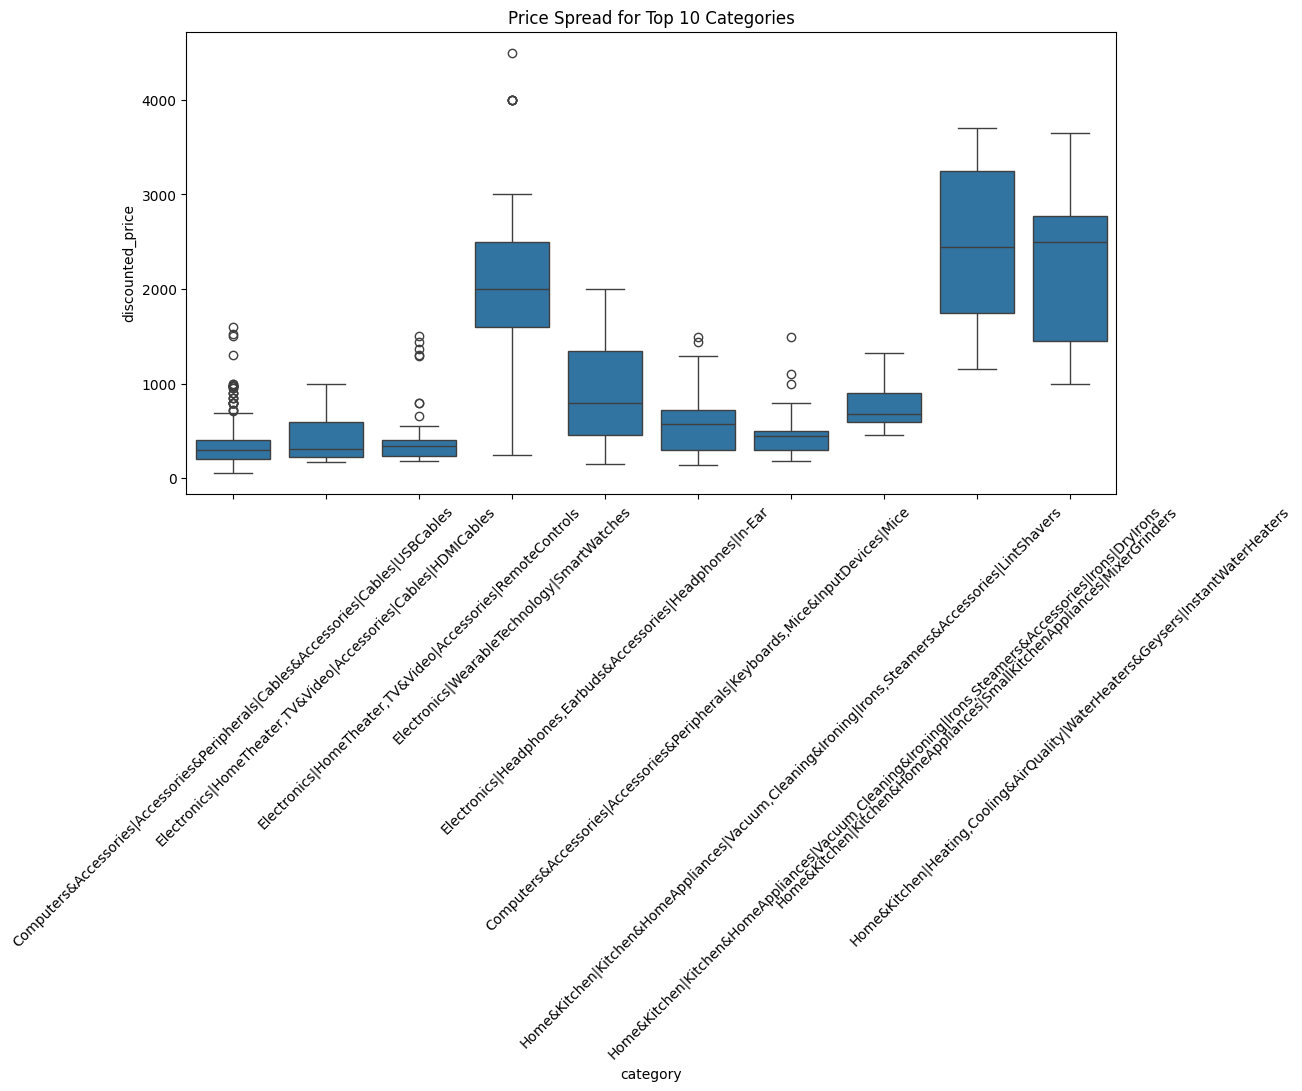

In [30]:
# Step 2: Visualizations (use df_scale for price/rating plots)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_scale, x='discounted_price', y='rating', alpha=0.6)
plt.title('Scaled Discounted Price vs Rating')
plt.xlabel('Discounted Price (scaled)')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Komal/screenshots/vis_scatter_price_rating.png')
plt.show()

# Bar chart: average rating per category (use df_sampled or df_scale)
plt.figure(figsize=(12,6))
avg_rating = df_sampled.groupby('category')['rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.title('Top 15 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Komal/screenshots/vis_bar_avg_rating_category.png')
plt.show()

# Histogram of discounted_price (unscaled) using df_no_outliers
plt.figure(figsize=(8,5))
sns.histplot(df_no_outliers['discounted_price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Komal/screenshots/vis_hist_prices.png')
plt.show()

# Boxplot to identify price spread by category (top 10 categories)
top_cats = df_no_outliers['category'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df_no_outliers[df_no_outliers['category'].isin(top_cats)],
            x='category', y='discounted_price')
plt.title('Price Spread for Top 10 Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Komal/screenshots/vis_box_price_by_category.png')
plt.show()


In [31]:
# Step 4.1: General overview
info_df = df_scale.info()
describe_df = df_scale.describe(include='all')
display(df_scale.info())
display(df_scale.describe())

# Save screenshots programmatically (optional)
# Note: Jupyter's display output is fine; take manual screenshots.


<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 824 to 4
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           874 non-null    object  
 1   product_name         874 non-null    object  
 2   category             874 non-null    object  
 3   discounted_price     874 non-null    object  
 4   actual_price         874 non-null    object  
 5   discount_percentage  874 non-null    object  
 6   rating               874 non-null    object  
 7   rating_count         874 non-null    object  
 8   user_id              874 non-null    object  
 9   user_name            874 non-null    object  
 10  rating_level         874 non-null    category
dtypes: category(1), object(10)
memory usage: 108.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 824 to 4
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               ----

None

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name,rating_level
count,874,874,874,874.000000,874.000000,874.000000,874.0,874.0,874,874,874
unique,814,807,166,334.000000,271.000000,90.000000,24.0,165.0,749,749,2
top,B09CMP1SC8,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,0.035874,0.048096,0.638298,4.1,0.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",High
freq,3,4,166,43.000000,85.000000,42.000000,144.0,677.0,6,6,827


In [32]:
# Central tendency measures (use df_scale or df_no_outliers depending on columns present)
numeric_cols = df_scale.select_dtypes(include=[np.number]).columns.tolist()
central_tendency = {}
for c in ['discounted_price','actual_price','rating']:
    if c in df_scale.columns:
        central_tendency[c] = {
            'min': df_scale[c].min(),
            'max': df_scale[c].max(),
            'mean': df_scale[c].mean(),
            'median': df_scale[c].median(),
            'mode': df_scale[c].mode().iloc[0] if not df_scale[c].mode().empty else np.nan
        }

import pprint
pprint.pprint(central_tendency)


{'actual_price': {'max': 0.9999999999999999,
                  'mean': np.float64(0.10572040075574486),
                  'median': np.float64(0.06312625250501003),
                  'min': 0.0,
                  'mode': 0.04809619238476954},
 'discounted_price': {'max': 1.0,
                      'mean': np.float64(0.20434456290853864),
                      'median': np.float64(0.12556053811659193),
                      'min': 0.0,
                      'mode': 0.035874439461883414},
 'rating': {'max': 5.0,
            'mean': np.float64(4.092559021395253),
            'median': np.float64(4.1),
            'min': 2.3,
            'mode': 4.1}}


In [33]:
# Dispersion measures for discounted_price (unscaled) using df_no_outliers
col = 'discounted_price'
series = df_no_outliers[col].dropna()

dispersion = {
    'range': series.max() - series.min(),
    'q1': series.quantile(0.25),
    'q3': series.quantile(0.75),
    'iqr': series.quantile(0.75) - series.quantile(0.25),
    'variance': series.var(),
    'std_dev': series.std()
}
pprint.pprint(dispersion)


{'iqr': 1100.0,
 'q1': 299.0,
 'q3': 1399.0,
 'range': 4460.0,
 'std_dev': np.float64(887.1285290441442),
 'variance': np.float64(786997.0270440271)}
